In [337]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 

In [338]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function

from sklearn.model_selection import train_test_split

import numpy as np


# calculate accuracy measures and confusion matrix
from sklearn import metrics

In [339]:
bank = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

In [340]:
bank.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [341]:
bank.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [342]:
bank.shape

(5000, 14)

In [343]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [344]:
bank[~bank.applymap(np.isreal).all(1)]

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard


In [345]:
bank.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


Min of experience is -3 which doesnt seems to be a valid value.

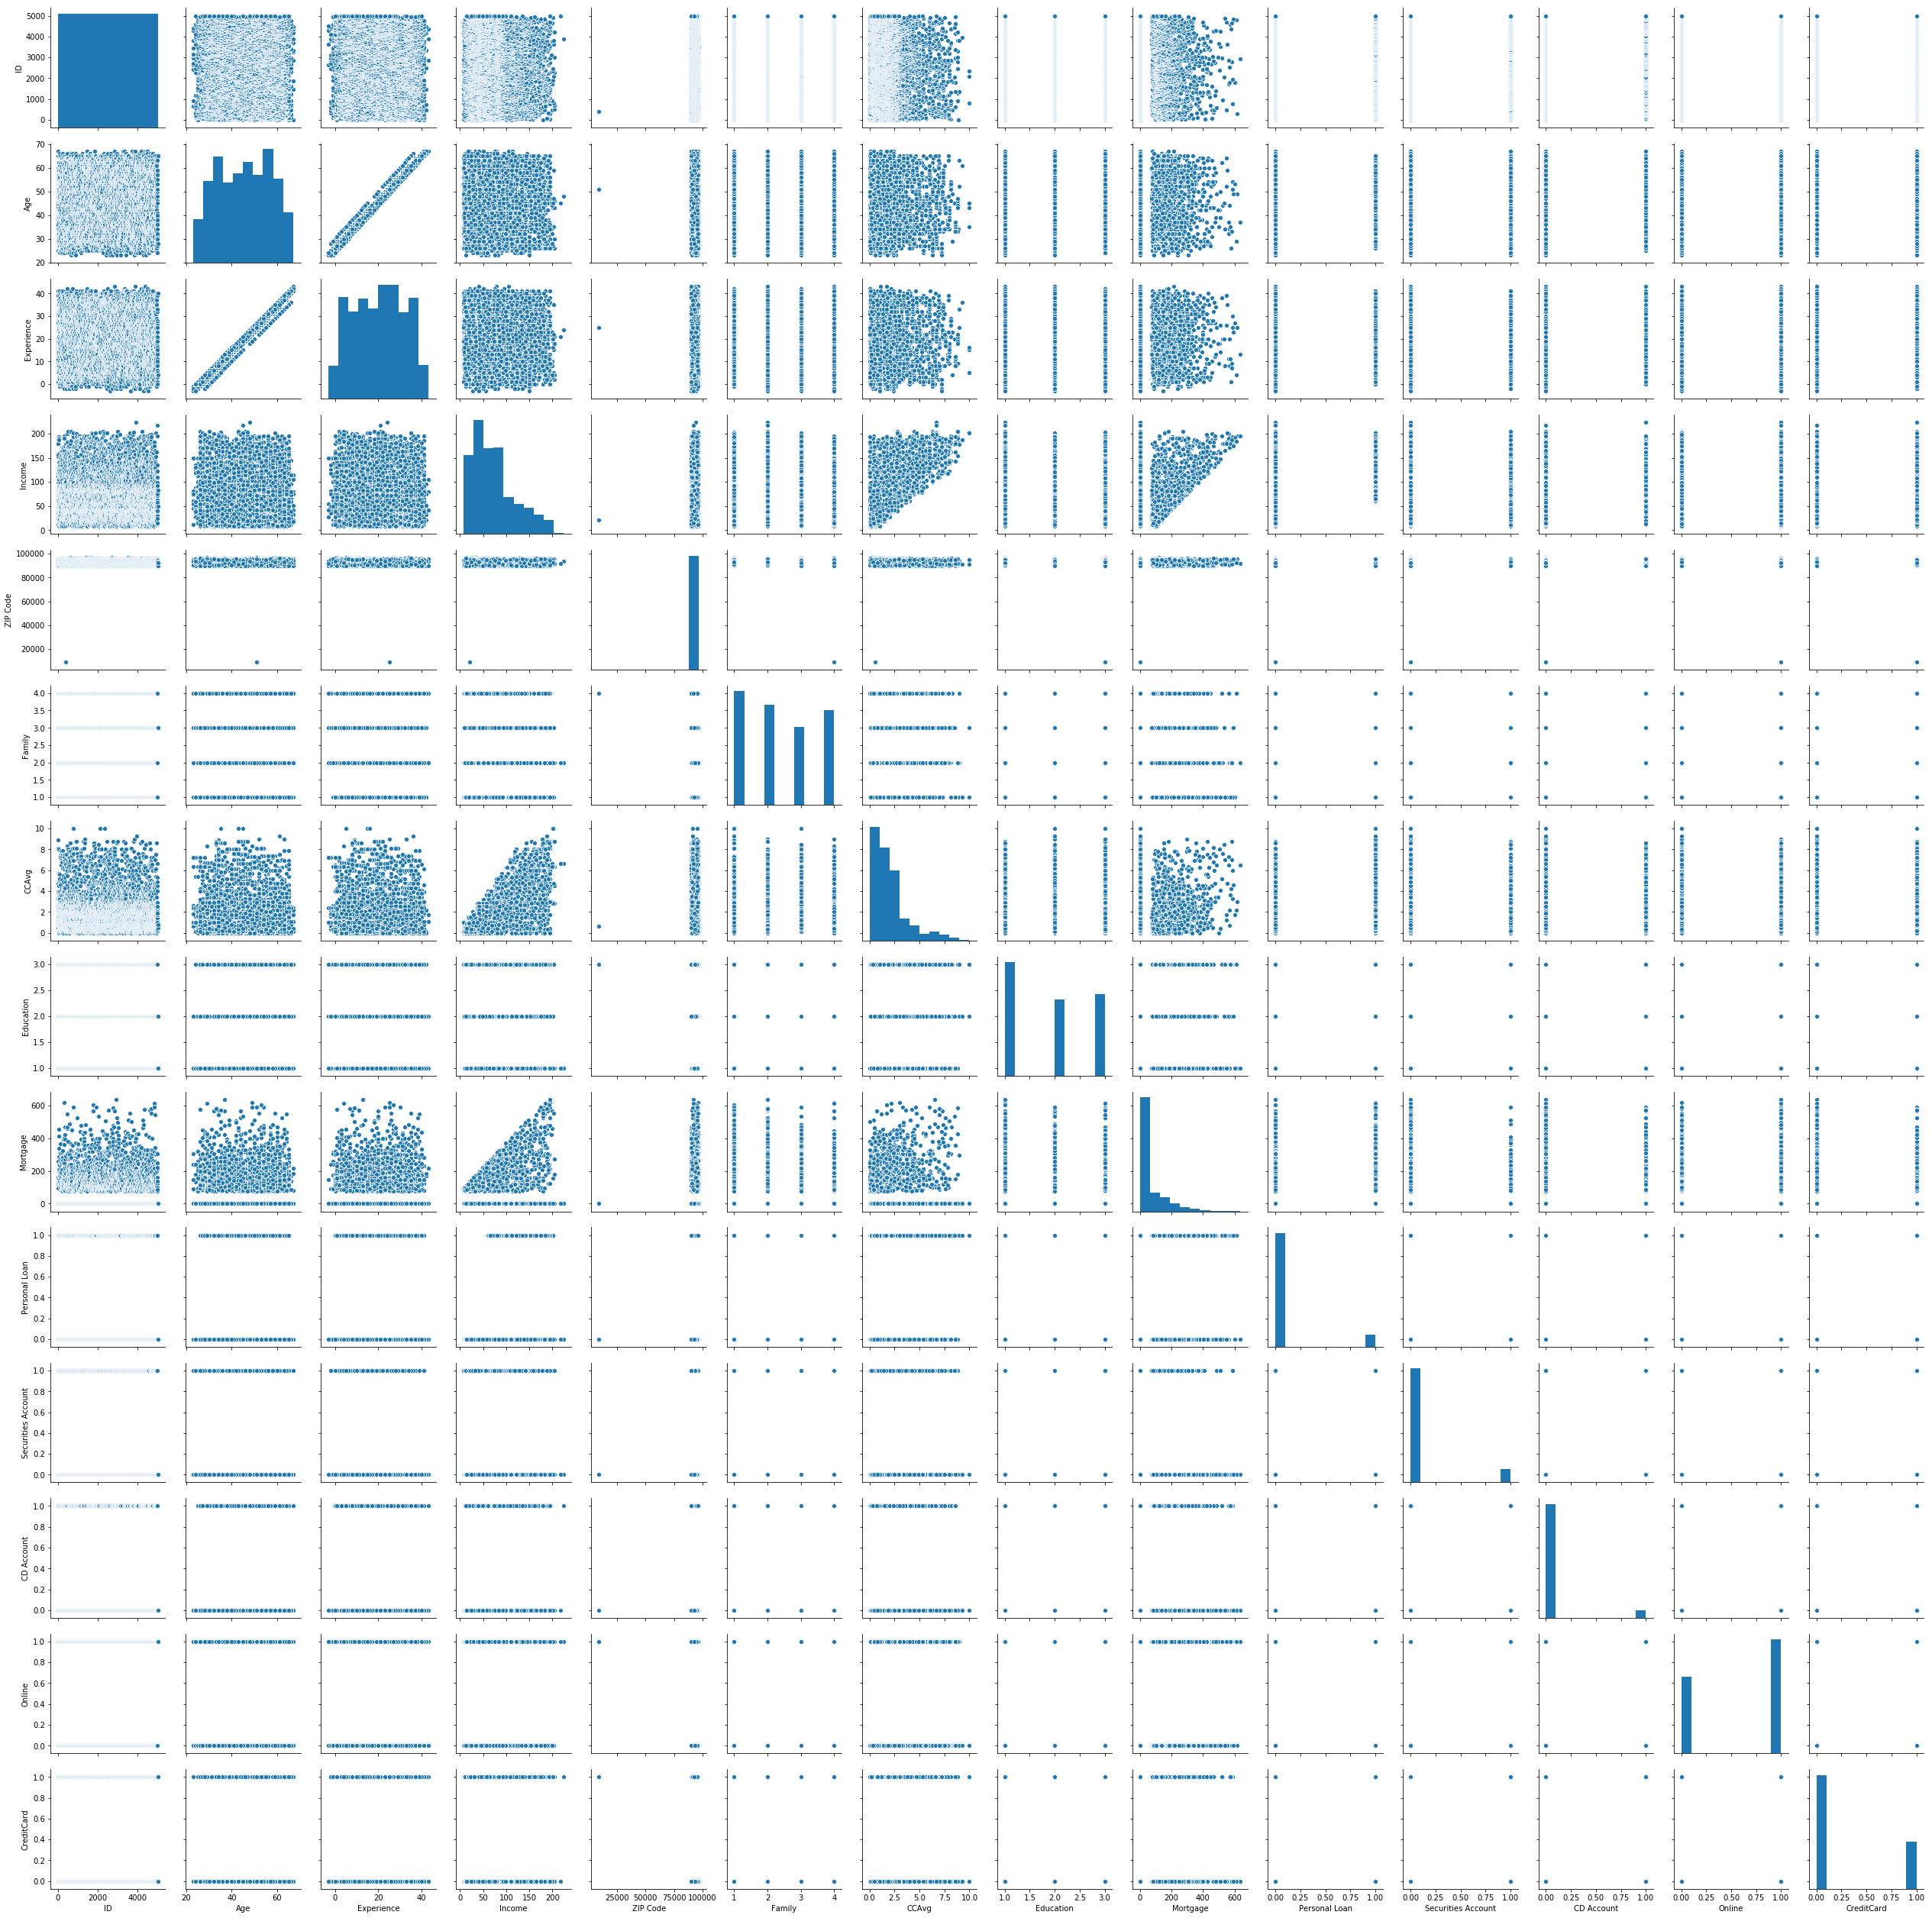

In [346]:
sns.pairplot(bank)

Observations about data:
Age: data seems to be normally distributed. Majority of the customers are in the age range of 30 to 60 years. Mean and median values are almost equal

Experience: data seems to be normally distribted. Mean and Median values almost equal. More customers are having experiene more than 8 years. There are some records with negative values which could be due to error while capturing the data as in general its not possbile to count experience in negative.

Income: is right skewed as mean is greater than median. Most of the data records are in the range of income 45K to 55K

Family: data is ordinal

CCAvg: is right skewed as mean is greater than median. Most of the data records shows spending is below 2.5K and average spending is between 0K to 10K

Education: data is ordinal

Mortgage: Most of the data records shows that customers are having mortgage lesser than 40K though the max value is 635K


In [347]:
#get the count of records having experience lesser than 0
bank[bank < 0].count()

ID                     0
Age                    0
Experience            52
Income                 0
ZIP Code               0
Family                 0
CCAvg                  0
Education              0
Mortgage               0
Personal Loan          0
Securities Account     0
CD Account             0
Online                 0
CreditCard             0
dtype: int64

In [348]:
# # instead of applying median of all the records for substiuting negative experience, we can apply median of records which are similar
# # to them in terms of other column's values like age, education etc.
# dfposExp = bank.loc[bank['Experience'] >0]
# mask = bank.Experience < 0
# column_name = 'Experience'
# cust_list = bank.loc[mask]['ID'].tolist() # getting the customer IDs with negative values in experience

In [349]:
# for id in cust_list:
#     age = bank.loc[np.where(bank['ID']==id)]["Age"].tolist()[0]
#     education = bank.loc[np.where(bank['ID']==id)]["Education"].tolist()[0]
#     df_filtered = dfExp[(dfExp.Age == age) & (dfExp.Education == education)]
#     exp = df_filtered['Experience'].median()
#     bank.loc[bank.loc[np.where(bank['ID']==id)].index, 'Experience'] = exp

In [350]:
val = bank[bank['Experience'] > 0]['Experience'].median()

In [351]:
bank[bank < 0] = val

In [352]:
df1 = bank[bank.isna().any(axis=1)]
df1

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard


In [353]:
bank.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.338000,11.253190,0.0,11.00,21.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


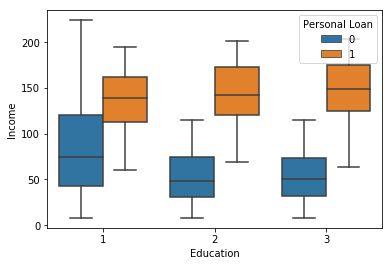

In [354]:
sns.boxplot(x='Education',y='Income',hue='Personal Loan',data=bank)

Observation : It seems the customers whose education level is 1 is having more income. However customers who has taken the personal loan have the same income levels

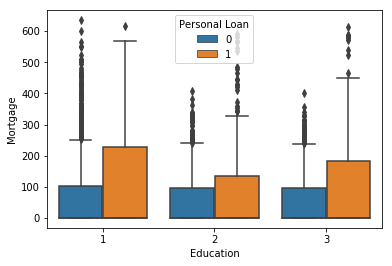

In [355]:
sns.boxplot(x="Education", y='Mortgage', hue="Personal Loan", data=bank)

Observation: Customers who taken loan also have higher mortgages.

In [356]:
#removing spaces from column names
bank.columns = ["ID","Age","Experience","Income","ZIPCode","Family","CCAvg","Education","Mortgage","PersonalLoan","SecuritiesAccount","CDAccount","Online","CreditCard"]

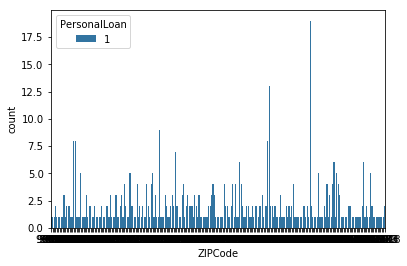

In [357]:
sns.countplot(x="ZIPCode", data=bank[bank.PersonalLoan==1], hue ="PersonalLoan")

In [358]:
zipcode_top5 = bank[bank.PersonalLoan==1]['ZIPCode'].value_counts().head(5)
zipcode_top5

94720    19
94305    13
92093     9
90095     8
90089     8
Name: ZIPCode, dtype: int64

Observation: Top 5 locations who appled personal loan before

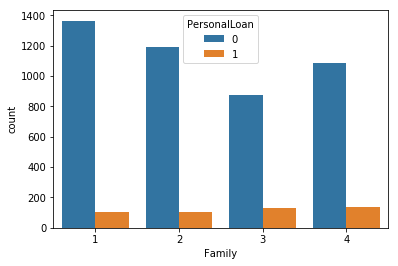

In [359]:
sns.countplot(x="Family", data=bank,hue="PersonalLoan")

Observation: Family size does not seems to be having any effect in personal loan.

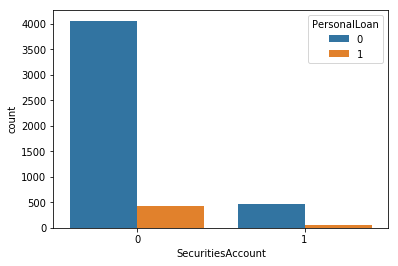

In [360]:
sns.countplot(x="SecuritiesAccount", data=bank,hue="PersonalLoan")

Observation : Majority of customers who does not have loan have securities account

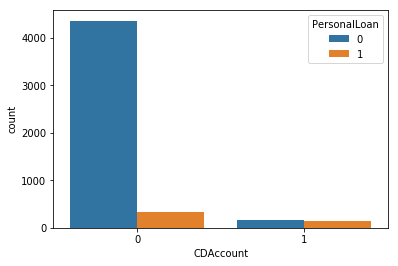

In [361]:
sns.countplot(x='CDAccount',data=bank,hue='PersonalLoan')

Observation: Almost all customers who has CD account has loan as well. And Majority of the Customers who does not have CD account , does not have loan as well.

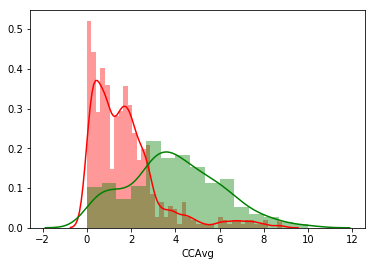

In [362]:
sns.distplot( bank[bank.PersonalLoan == 0]['CCAvg'], color = 'red')
sns.distplot( bank[bank.PersonalLoan == 1]['CCAvg'], color = 'green')

In [363]:
print('Credit card spending of Non-Loan customers: ',bank[bank.PersonalLoan == 0]['CCAvg'].median()*1000)
print('Credit card spending of Loan customers    : ', bank[bank.PersonalLoan == 1]['CCAvg'].median()*1000)


Credit card spending of Non-Loan customers:  1400.0
Credit card spending of Loan customers    :  3800.0


Observation: The graph show data records of customers who have personal loan have a higher credit card average. Average credit card spending with a median of 3800 indicates a higher probability of personal loan. Lower credit card spending with a median of 1400 is less likely to take a loan.

In [364]:
corr = bank.corr()
corr

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
ID,1.000000,-0.008473,-0.009386,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.975489,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.009386,0.975489,1.000000,-0.049123,-0.028453,-0.045149,-0.048616,0.018289,-0.013482,-0.014314,-0.000432,0.005292,0.013422,0.008823
Income,-0.017695,-0.055269,-0.049123,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIPCode,0.013432,-0.029216,-0.028453,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.045149,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.048616,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.018289,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.013482,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
PersonalLoan,-0.024801,-0.007726,-0.014314,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


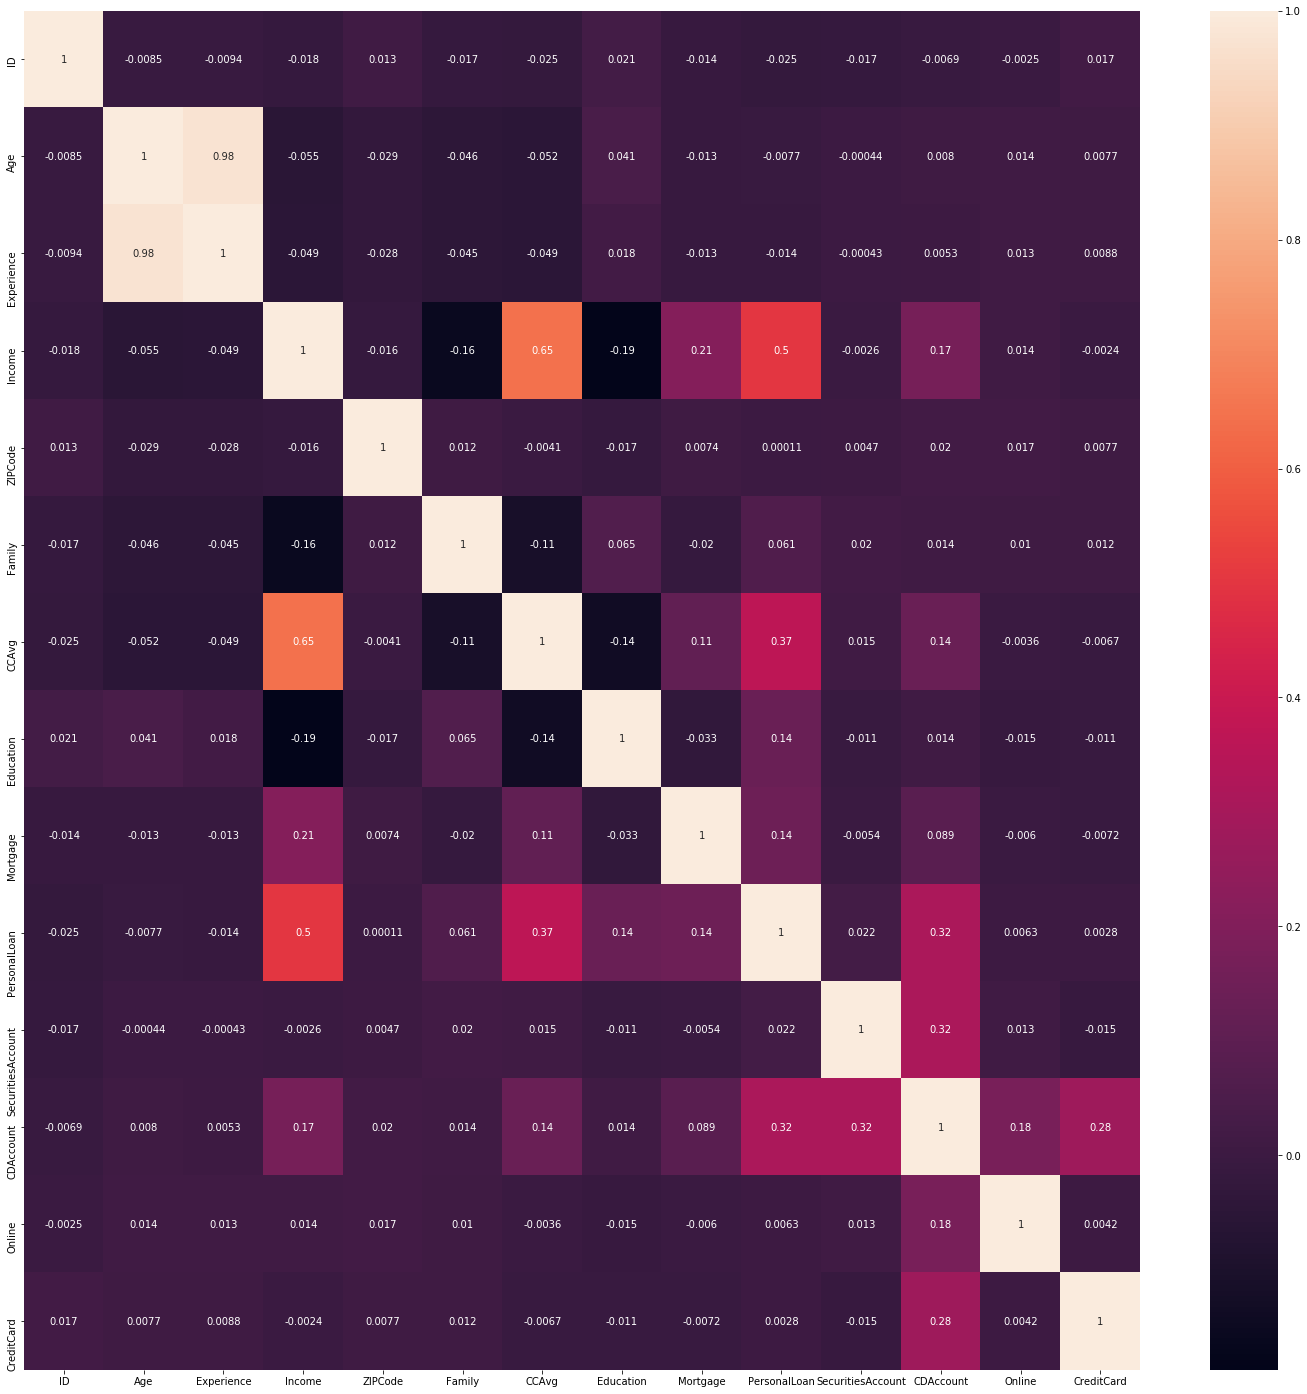

In [365]:
from matplotlib import pyplot as plt
plt.figure(figsize=(25, 25)) 
sns.heatmap(corr, annot=True)

Observation: Age and experience are highly corelated
Income and CCAvg are moderately correlated.

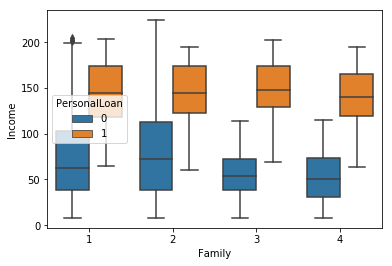

In [366]:
sns.boxplot(x=bank.Family,y=bank.Income,hue=bank.PersonalLoan)

Observation: Families with income less than 100K are less likely to take loan,than families with high income

In [370]:
from sklearn.model_selection import train_test_split

bank_features = bank.drop(['ID','PersonalLoan'], axis=1)

X = bank_features.iloc[:,0:12]
y = bank['PersonalLoan']

test_size = 0.30 # taking 70:30 training and test set
seed =1 # Random numbmer seeding for reapeatability of the code
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X, y, test_size=test_size, random_state=seed)

In [371]:
X_train_lr.describe()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,SecuritiesAccount,CDAccount,Online,CreditCard
count,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000
mean,45.435429,20.471143,73.640000,93154.421429,2.395143,1.934306,1.886286,56.054857,0.104571,0.062571,0.591143,0.297429
std,11.507821,11.267641,46.168251,2259.694861,1.145654,1.734706,0.839634,100.523942,0.306044,0.242225,0.491693,0.457192
min,23.000000,0.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,11.000000,39.000000,91910.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,45.000000,21.000000,63.000000,93555.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,100.250000,0.000000,0.000000,1.000000,1.000000
max,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,617.000000,1.000000,1.000000,1.000000,1.000000


In [372]:
X_test_lr.describe()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,SecuritiesAccount,CDAccount,Online,CreditCard
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000
mean,45.112000,20.027333,74.087333,93148.026667,2.399333,1.946413,1.868667,57.534667,0.104000,0.055333,0.610000,0.28600
std,11.358879,11.217002,45.732111,1759.387617,1.152715,1.778071,0.840569,104.464156,0.305362,0.228706,0.487913,0.45204
min,23.000000,0.000000,8.000000,90009.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,35.000000,10.000000,39.000000,92007.000000,1.000000,0.670000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,45.000000,20.000000,64.000000,93305.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,1.000000,0.00000
75%,55.000000,29.000000,101.000000,94608.000000,3.000000,2.600000,3.000000,102.000000,0.000000,0.000000,1.000000,1.00000
max,67.000000,43.000000,202.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.000000,1.00000


In [373]:
print(y_test.shape,y_train.shape)
y_train.describe()

(1500,) (3500,)


count    3500.000000
mean        0.346571
std         2.295205
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        21.000000
Name: PersonalLoan, dtype: float64

In [374]:
model = LogisticRegression(solver='lbfgs', multi_class='ovr')
model.fit(X_train_lr, y_train_lr)
y_predict_lr = model.predict(X_test_lr)


coef_df = pd.DataFrame(model.coef_, columns= bank_features.columns)
coef_df['intercept'] = model.intercept_
print(coef_df)

        Age  Experience    Income   ZIPCode    Family     CCAvg  Education  \
0 -0.000451   -0.000578  0.036309 -0.000065  0.000172  0.001108   0.000227   

   Mortgage  SecuritiesAccount  CDAccount    Online  CreditCard  intercept  
0   0.00085           0.000009   0.000141  0.000012    0.000005  -0.000001  


In [375]:
model_score = model.score(X_test_lr, y_test_lr)
print(model_score)
print(metrics.confusion_matrix(y_test_lr, y_predict_lr))

0.908
[[1318   33]
 [ 105   44]]


In [376]:
# Improve the model -----------------------------Iteration 2 -----------------------------------------------

In [377]:
# To scale the dimensions we need scale function which is part of sckikit preprocessing libraries

from sklearn import preprocessing

# scale all the columns of the mpg_df. This will produce a numpy array
#pima_df_scaled = preprocessing.scale(pima_df[0:7])
X_train_scaled = preprocessing.scale(X_train_lr)
X_test_scaled = preprocessing.scale(X_test_lr)

C:\Users\JyotiK\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  import sys
C:\Users\JyotiK\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  


In [379]:
# Fit the model on 30%
model = LogisticRegression(solver='lbfgs', multi_class='ovr')

model.fit(X_train_scaled, y_train_lr)
y_predict_lr = model.predict(X_test_scaled)
model_score = model.score(X_test_scaled, y_test_lr)
print(model_score)


# IMPORTANT: first argument is true values, second argument is predicted values
# this produces a 2x2 numpy array (matrix)
print(metrics.confusion_matrix(y_test_lr, y_predict_lr))

0.9486666666666667
[[1335   16]
 [  61   88]]


KNN

In [380]:
from sklearn.neighbors import KNeighborsClassifier

In [381]:
from scipy.stats import zscore

In [411]:
# convert the features into z scores as we do not know what units / scales were used and store them in new dataframe

bank_features_z = bank_features.apply(zscore)  # convert all attributes to Z scale 

bank_features_z.describe()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,SecuritiesAccount,CDAccount,Online,CreditCard
count,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03
mean,2.478018e-17,-1.641354e-16,1.939449e-16,1.513445e-15,7.850609e-16,-2.078338e-17,-6.315837e-16,2.810197e-16,5.092149e-16,4.426903e-16,2.986500e-16,-3.697931e-16
std,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00
min,-1.948906e+00,-1.807491e+00,-1.428969e+00,-3.951919e+01,-1.216855e+00,-1.108987e+00,-1.049078e+00,-5.555239e-01,-3.414233e-01,-2.535403e-01,-1.216618e+00,-6.453143e-01
25%,-9.019702e-01,-8.298921e-01,-7.554825e-01,-5.851619e-01,-1.216855e+00,-7.084116e-01,-1.049078e+00,-5.555239e-01,-3.414233e-01,-2.535403e-01,-1.216618e+00,-6.453143e-01
50%,-2.952359e-02,5.883365e-02,-2.123482e-01,1.340930e-01,-3.454321e-01,-2.506106e-01,1.417029e-01,-5.555239e-01,-3.414233e-01,-2.535403e-01,8.219509e-01,-6.453143e-01
75%,8.429230e-01,8.586869e-01,5.263146e-01,6.860245e-01,5.259909e-01,3.216407e-01,1.332484e+00,4.375576e-01,-3.414233e-01,-2.535403e-01,8.219509e-01,1.549632e+00
max,1.889859e+00,2.014030e+00,3.263712e+00,1.648959e+00,1.397414e+00,4.613525e+00,1.332484e+00,5.688108e+00,2.928915e+00,3.944146e+00,8.219509e-01,1.549632e+00


In [412]:
# Capture the class values from the 'personalLoan' column into a pandas series akin to array 

bank_labels = bank["PersonalLoan"]

In [413]:
# store the normalized features data into np array 

X_knn = np.array(bank_features_z)
X_knn.shape

(5000, 12)

In [414]:
# store the bc_labels data into a separate np array

y_knn = np.array(bank_labels)
y_knn.shape

(5000,)

In [415]:
# Split X and y into training and test set in 70:30 ratio

X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X_knn, y_knn, test_size=0.30, random_state=2)

In [416]:
# Call Nearest Neighbour algorithm

NNH = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )

NNH.fit(X_train_knn, y_train_knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='distance')

In [417]:
# For every test data point, predict it's label based on 5 nearest neighbours in this model. The majority class will 
# be assigned to the test data point

predicted_labels = NNH.predict(X_test_knn)
NNH.score(X_test_knn, y_test_knn)

0.952

In [418]:
# calculate accuracy measures and confusion matrix
from sklearn import metrics

print(metrics.confusion_matrix(y_test_knn, predicted_labels))

[[1361    1]
 [  71   67]]


In [419]:
# To improve performance ------------------------- Iteration 2 -----------------------------------

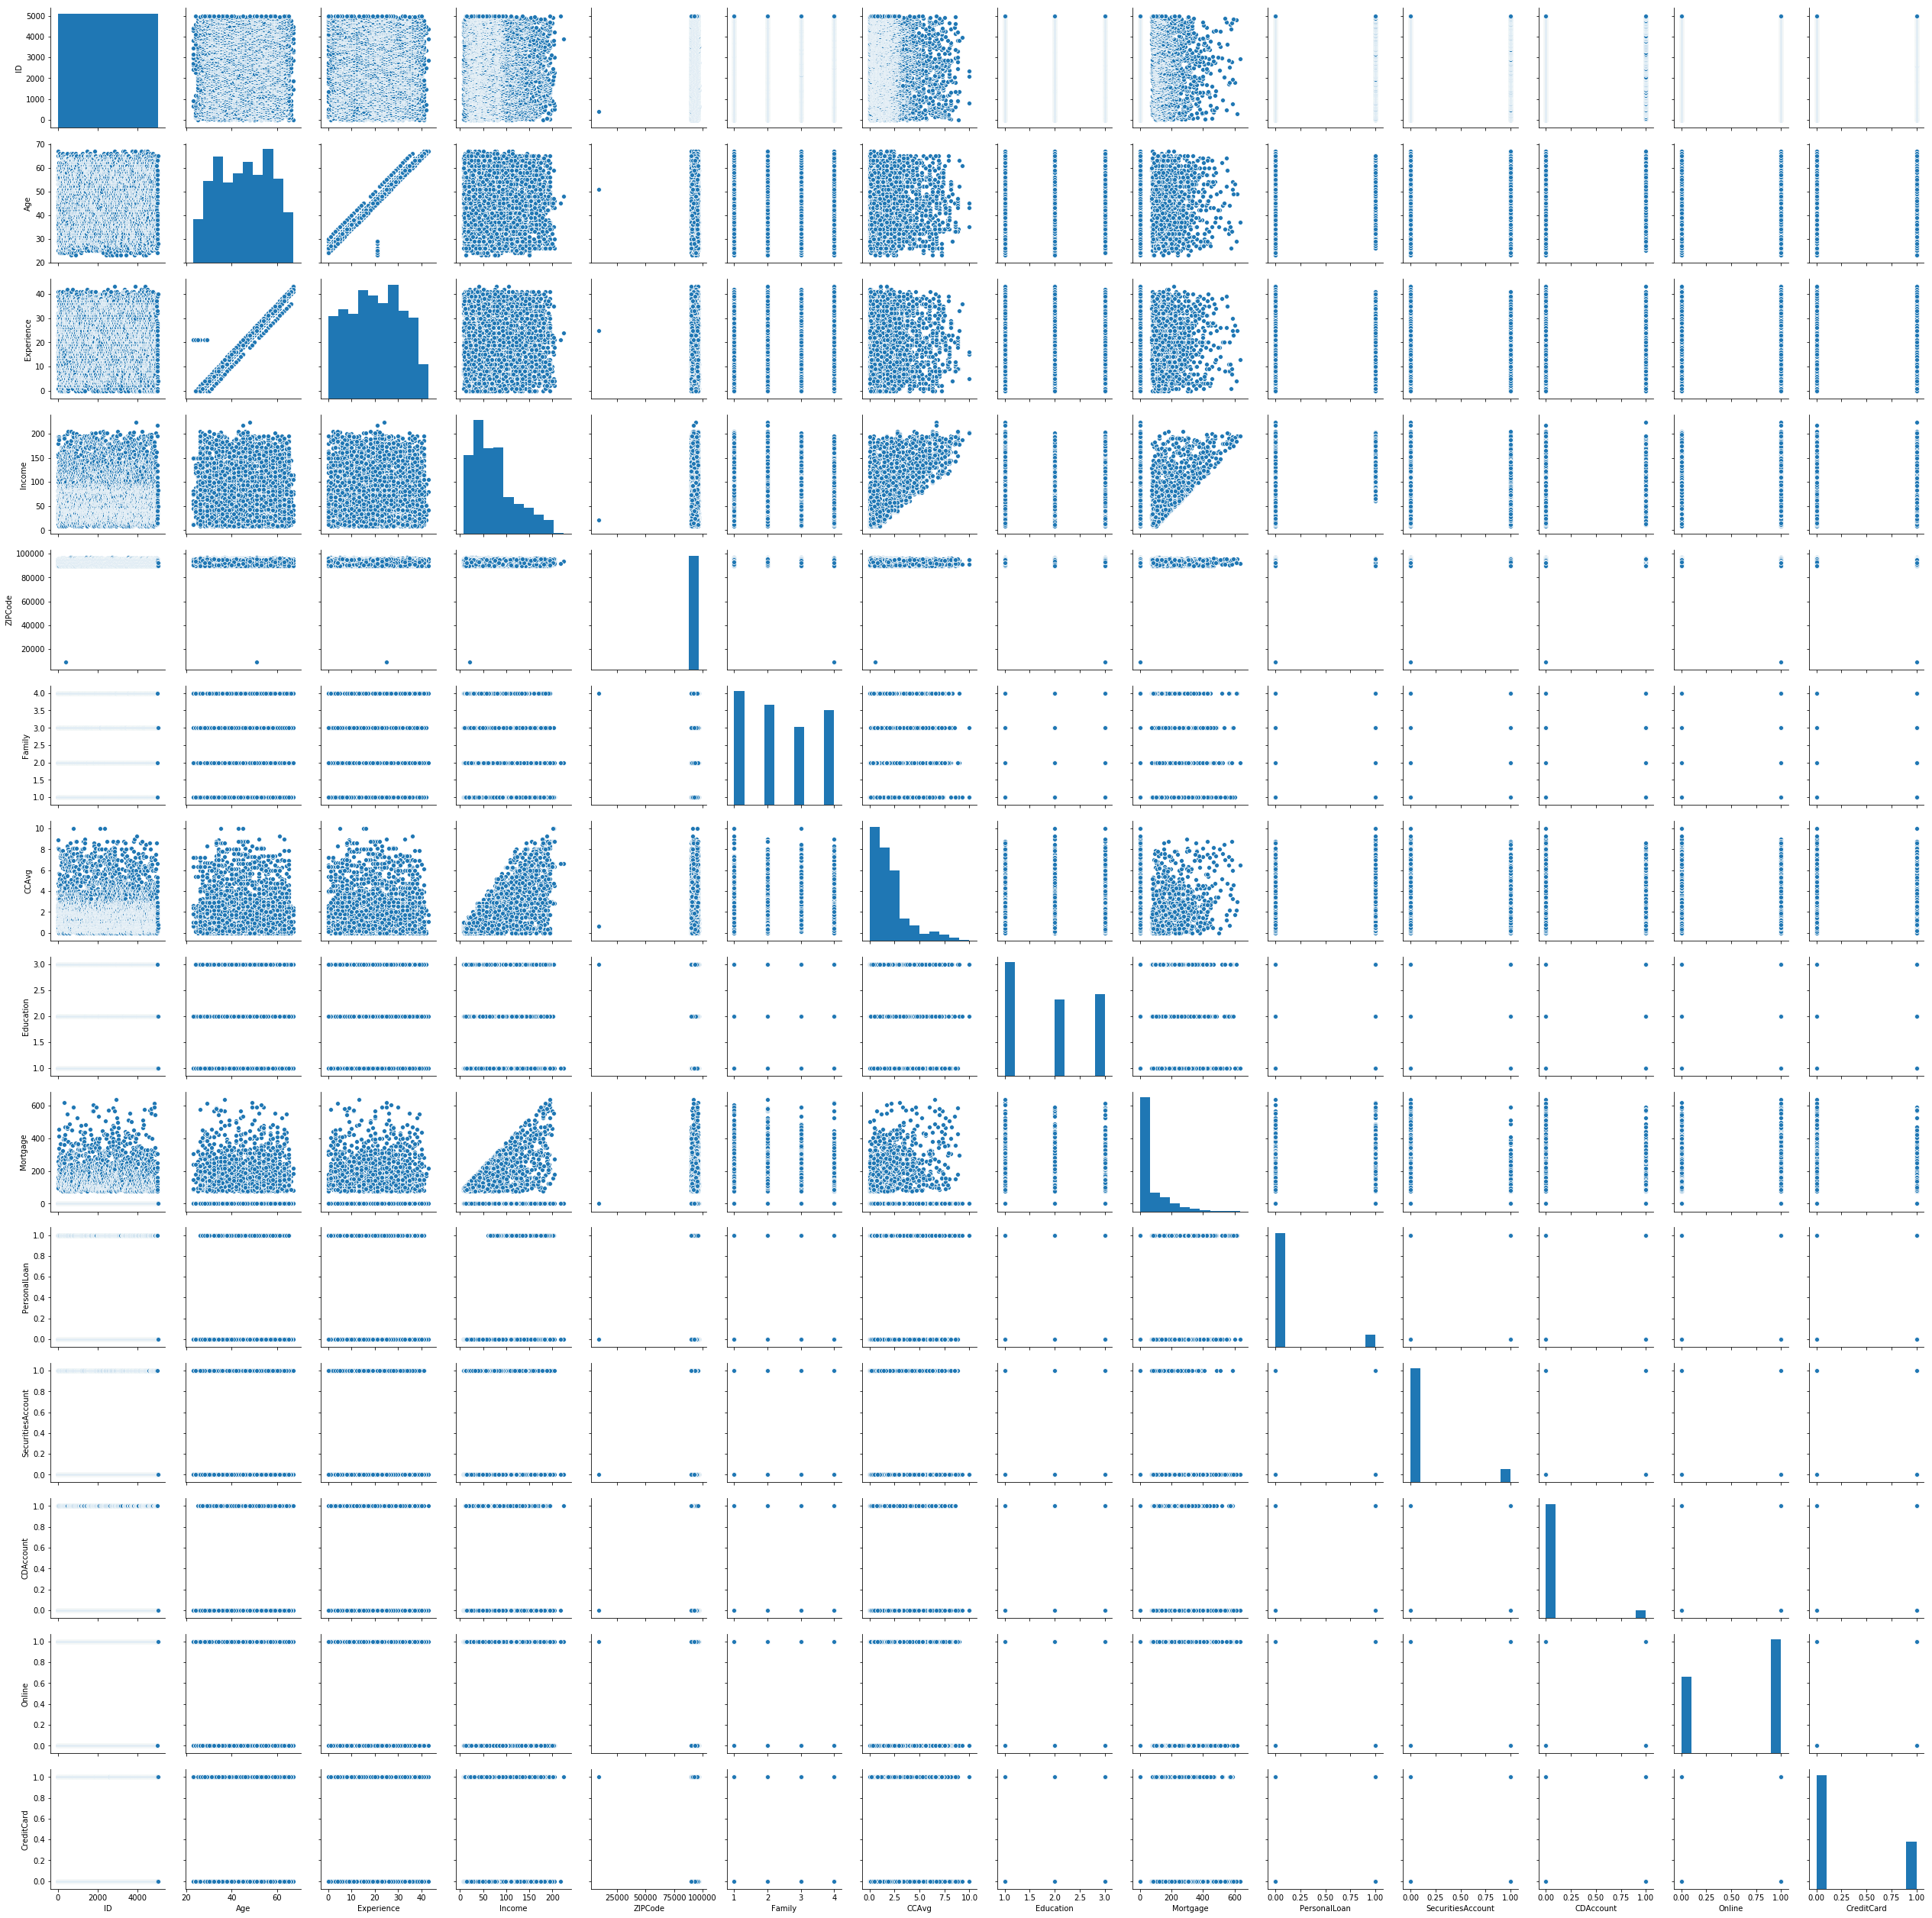

In [420]:
# Let us analyze the different attributes for distribution and the correlation by using scatter matrix

sns.pairplot(bank)

In [421]:
# To to drop dependent columns from bc_df

bank_features_pruned_z =  bank_features_z.drop(['Experience','CCAvg'], axis=1)

In [422]:
X = np.array(bank_features_pruned_z)



X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X_knn, y_knn, test_size=0.30, random_state=2)

In [423]:
# Call Nearest Neighbour algorithm

NNH.fit(X_train_knn, y_train_knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='distance')

In [424]:
# For every test data point, predict it's label based on 5 nearest neighbours in this model. The majority class will 
# be assigned to the test data point

predicted_labels = NNH.predict(X_test_knn)

In [425]:
# get the accuracy score which is how many test cases were correctly predicted as a ratio of total number of test cases

NNH.score(X_test_knn, y_test_knn)

0.952

In [429]:
# Call Nearest Neighbour algorithm with increasing the value from 5 to 11

NNH = KNeighborsClassifier(n_neighbors= 21 , weights = 'distance' )

NNH.fit(X_train_knn, y_train_knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=21, p=2,
           weights='distance')

In [430]:
# For every test data point, predict it's label based on 5 nearest neighbours in this model. The majority class will 
# be assigned to the test data point

predicted_labels = NNH.predict(X_test_knn)
NNH.score(X_test_knn, y_test_knn)

0.9466666666666667

In [428]:
# calculate accuracy measures and confusion matrix
from sklearn import metrics

print(metrics.confusion_matrix(y_test_knn, predicted_labels))

[[1362    0]
 [  75   63]]


Naive Bayes

In [398]:
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection

In [399]:
test_size = 0.30 # taking 70:30 training and test set
seed = 3  # Random numbmer seeding for reapeatability of the code
X_train_nb, X_test_nb, y_train_nb, y_test_nb = model_selection.train_test_split(X, y, test_size=test_size, random_state=seed)

In [400]:

naive_model = GaussianNB()
naive_model.fit(X_train_nb, y_train_nb)
print(naive_model)
# make predictions
expected_nb = y_test_nb
predicted_nb = naive_model.predict(X_test_nb)
# summarize the fit of the model
print(metrics.classification_report(expected_nb, predicted_nb))
print(metrics.confusion_matrix(expected_nb, predicted_nb))

GaussianNB(priors=None, var_smoothing=1e-09)
              precision    recall  f1-score   support

           0       0.95      0.94      0.94      1349
           1       0.50      0.51      0.50       151

   micro avg       0.90      0.90      0.90      1500
   macro avg       0.72      0.73      0.72      1500
weighted avg       0.90      0.90      0.90      1500

[[1272   77]
 [  74   77]]


In [401]:
naive_model.score(X_test_nb,y_test_nb)

0.8993333333333333

Conclusion: Logistic Regression Iteration 1 score was 0.908 and the model performance was increased to 0.9486 in the second iteration.
For KNN the score was 0.952 in Iteration 1 and it remained constant in Iteration 2 as well. When we increase the n_neighbours value from 5 to ,9,11 and so on the model score decreases. It becomes 0.9466 for n_neighbours = 21.
For Niave Bayes the score was 0.8993 (lowest of all the models)

For KNN though the model performance is better we need to decide on the correct n_neighbour number. Even after increasing n_neighbours to 21 the model score is near logistic regression model score of iteration 2.
So we can either use KNN or logistic regression as the model performance increases with iterations otherwise.